<a href="https://colab.research.google.com/github/dddonghwa/IAB/blob/main/Computer-Vision/5_CIFAR10_CNN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch를 이용해서 CIFAR 10 이미지 분류 해보기

# 딥러닝 모델을 학습시키기 위해 준비되어야 할 4가지 요소

1. 데이터
2. 모델
3. Loss function (손실함수, 목적함수, objective function 등으로 불려요): 정답과 모델의 예측값을 어떤 식으로 비교할지 결정해주는 함수
4. Optimizer: gradient descent를 해줄 애. 즉, 모델의 파라미터를 어느 방향으로 조금 수정할지 결정하고 수정해주는 함수

In [1]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

## 모델에 데이터 넣을 준비하기

우선 사용하고 싶은 데이터 파일이 있다면 그걸 우선 numpy array 형식으로 불러와야 해요<br/>
그리고는 필요한 전처리를 해준 후에 이 numpy array를 `torch.*Tensor` 형식으로 변환하고 <br/>
dataloader에 넣어주면 pytorch로 짠 딥러닝 모델에 넣을 준비가 된 것입니다.<br/>

대개 이제 이런 데이터 처리를 도와주는 패키지들이 있는데<br/>
이미지는 openCV, Pillow를 많이 쓰고,<br/>
텍스트에는 SpaCy를 많이 사용해요. <br/>

그런데 pytorch에서 고맙게도 그 데이터를 불러오고 전처리를 하는 걸<br/>
파이토치와 매끄럽게 잘 이어지도록 도와주는 패키지를 만들었놨어요.<br/>
* [torchvision](https://pytorch.org/docs/stable/torchvision/index.html#)
* [torchtext](https://torchtext.readthedocs.io/en/latest/)

몇몇 대표 데이터셋들은 해당 패키지에 이미 들어있어서<br/>
그냥 가져다 불러와서 쓰고 몇몇 처리만 해주면 사용할 준비가 끝나요!

이번에는 CIFAR 10이라는 데이터셋을 사용합니다.<br/>
이는 대표적인 데이터셋 중 하나라서 기억해두시면 이따금씩 보일 거예요.<br/>
클래스가 10개라서 CIFAR 10입니다.<br/>

들어있는 클래스는<br/>
‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’ 입니다.<br/>
size는 3x32x32이고 앞의 3은 RGB여서 그런 거예요.<br/>

In [86]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# 이미지는 RGB  3가지의 채널로 이루어져있으므로, 각 채널에 대한 mean, std를 넣어줘서 normalize해줘야 해요
# 이미지 데이터의 값이 0~1 사이였는데 이를 통해 -1 ~ +1 사이로 변환해줍니다.

batchsize = 16

# 너무나 간단합니다. torchvision에 이미 다 알아서 처리가 되어있어서 이렇게 편하게 불러올 수 있는 거예요!
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=2)

# 이런 클래스들이 데이터셋 안에 있습니다.
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## 학습 이미지 예시 보기

32x32짜리 이미지라서 화질이 안 좋은 건 자연스러운 일입니다... <br/>
놀랍게도 이런 이미지들로 학습을 합니다.

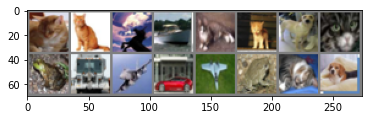

정답:  cat  		   cat  		 horse  		  ship


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # 아까 앞에서 normalize해줘서 색깔 이미지가 이상해져있을 거기 때문에 보기 편하라고 다시 unnormalize해줍니다
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print( '정답:' + '  \t\t '.join('%5s' % classes[labels[j]] for j in range(4)))

## 모델 정의하기

앞선  notMNIST는 흑백 이미지라서 채널이 1개였지만 <br/>
여기서는 컬러 이미지라서 채널이 3개라는 거에 유의합니다.

In [119]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # zero padding, 3 RGB channel, 6 filter depths, 5X5 filter size
        self.conv1 = nn.Conv2d(3, 6, 5, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        ############### fc layer를 완성해보세요 ################
        # [32,32,3] =(conv2d)=> [30,30,6]
        # [30,30,6] =(pool)=> [15,15,6]
        # [15,15,6] =(relu)=> [15,15, 6]
        self.fc1 = nn.Linear(15*15*6 , 10)
        
        ########################################################

    def forward(self, x):
        # x = self.conv1(x)
        # x = self.relu(x)
        # x = self.pool(x)
        
        # 위를 압축해서 쓴 게 아래 줄이에요!
        x = self.pool(self.relu(self.conv1(x)))
        
        ############### 빈칸을 완성 해보세요 ################
        
        x = x.view(-1, 15*15*6)  # 얘의 기능은 텐서의 모양을 원하는 모양으로 바꿔주는 거예요
        # 그냥 예시: x가 만약 (16, 3, 12, 12) 모양이었다면 x.view(-1, 144)는 (48, 144) 모양으로 바꿔준답니다. -1은 나머지 숫자를 자동으로 채워주는 역할이에요
        
        ########################################################
        x = self.fc1(x)

        return x


net = Net()

## Loss function과 Optimizer 정의하기

Cross-entropy loss function과 SGD optimizer를 씁니다.


In [124]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지. 

## 모델 학습시키기

이제
* data loader
* model
* loss function
* optimizer

이 4가지가 모두 준비되었으니 학습을 할 준비가 끝났습니다.

```
종료 조건 만족할 때까지 아래를 반복:
    1. 우리의 data loader로부터 데이터를 받아와서 모델에 넣어주고
    2. 모델의 출력 값을 받아서 
    3. loss function 값을 계산하고
    4. 그 loss를 바탕으로 backprop(=gradient를 계산) 해준 뒤 
    5. optimizer가 gradient descent를 1 step 진행합니다.
    ```

### 근데...

학습을 하면서 테스트셋 성적이 어떻게 변하는지를 보는 건 어때요?

In [125]:
training_loss_history = []
test_loss_history = []

In [ ]:
for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # trainloader로부터 데이터와 라벨을 받아옵니다.
        inputs, labels = data

        # 매 반복마다 이전 gradient를 한 번 지워줍니다.
        optimizer.zero_grad()

        # 모델에 데이터 넣어서 forward 해주고 
        # backprop으로 이번 input에 대해 gradient를 계산해주고
        # optimizer가 gradient descent 1스텝 진행
        # print(inputs.shape, labels.shape)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 결과치 화면에 뿌려주기
        running_loss += loss.item()
        if i % 200 == 199:    # 2000 미니배치마다 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            # 나중에 시각화를 위해 중간중간 따로 loss값 저장
            training_loss_history.append(running_loss / 200)
            
            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()
                
                test_loss_history.append(running_test_loss / i)
                    
            running_loss = 0.0
                    
print('학습 끝!')

[1,   200] loss: 2.171
[1,   400] loss: 1.889
[1,   600] loss: 1.767
[1,   800] loss: 1.674
[1,  1000] loss: 1.601
[1,  1200] loss: 1.593
[1,  1400] loss: 1.484
[1,  1600] loss: 1.464
[1,  1800] loss: 1.416
[1,  2000] loss: 1.426
[1,  2200] loss: 1.414
[1,  2400] loss: 1.371
[1,  2600] loss: 1.367
[1,  2800] loss: 1.341
[1,  3000] loss: 1.281
[2,   200] loss: 1.230
[2,   400] loss: 1.241
[2,   600] loss: 1.204
[2,   800] loss: 1.227
[2,  1000] loss: 1.211
[2,  1200] loss: 1.167
[2,  1400] loss: 1.112
[2,  1600] loss: 1.142
[2,  1800] loss: 1.130
[2,  2000] loss: 1.191
[2,  2200] loss: 1.158
[2,  2400] loss: 1.118
[2,  2600] loss: 1.124
[2,  2800] loss: 1.090
[2,  3000] loss: 1.106
학습 끝!


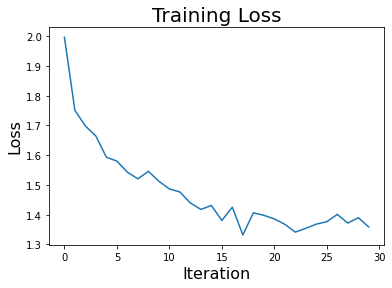

In [8]:
plt.plot(training_loss_history) 
plt.title('Training Loss', fontsize=20)  # 여기에 한글을 넣고 싶으시다구요? 그럼 좀 귀찮은 몇 가지 작업들을 해야 합니다... 그러므로 패스
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

[그래도 난 matplotlib에 한글을 넣겠어!](https://programmers.co.kr/learn/courses/21/lessons/950)

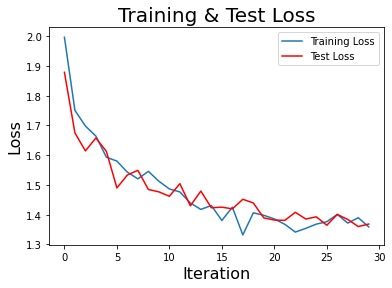

In [9]:
plt.plot(training_loss_history, label="Training Loss") 
plt.plot(test_loss_history, 'r', label="Test Loss") 
plt.title('Training & Test Loss', fontsize=20) 
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.show()

## 모델 저장하기

학습이 끝난 모델의 파라미터를 저장해두면 나중에 필요할 때 불러와서 가져다 쓰면 바로 사용할 수 있어요.

In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## 테스트셋에 검증해보기

이제 모델 학습이 끝났으니 테스트 데이터에도 잘하는지 확인을 해봐야 합니다. <br/>
테스트셋 데이터 중 몇 개나 맞히는지 알아볼까요?

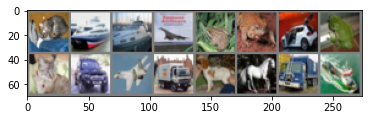

In [11]:
# 테스트셋 이미지 예시도 심심풀이로 한 번 확인해보기
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=2)
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

### 아까 저장해뒀던 모델 파라미터 불러오기

사실 굳이 불러오지 않고 그냥 위에 있는 `net` 그대로 써도 되지만 <br/>
일단 어떻게 저장하고 불러오는지 여러분이 알아둬야 하니까 여기서는 `net`에 굳이 다시 불러와봤어요

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

이미지들을 넣었을 때 모델이 뭐라고 예측하는지 한 번 확인해볼게요.

In [13]:
outputs = net(images)
outputs

tensor([[-1.5646, -1.9245,  1.1513,  1.8371, -2.2583,  2.5696,  0.3553, -1.7911,
          2.1373,  0.2452],
        [ 6.1121, 10.7515, -4.4003, -3.8343, -4.1269, -8.2427, -5.2972, -5.5646,
          8.7404,  6.0436],
        [ 3.4791,  1.3141,  0.6362, -1.4216, -2.2770, -3.2308, -4.2155, -0.8585,
          4.0559,  1.9154],
        [ 4.0762,  0.8498,  2.3238, -3.4681, -1.6168, -4.3369, -1.7828, -0.5094,
          3.4170,  0.8594],
        [-3.0467, -0.6069,  0.3513,  2.8272,  3.6817,  0.5424,  1.9338, -0.3178,
         -3.3207, -1.4021],
        [-1.7006,  0.5388, -1.1844, -0.4096, -0.8152,  0.5776,  2.6581,  0.9436,
         -3.3604,  2.5837],
        [-0.0992,  4.3224, -2.3681,  1.6849, -4.8950,  1.5550,  1.0564, -1.3053,
         -0.9312,  1.7433],
        [-0.0483, -1.8646,  1.1525,  0.6275,  2.0120,  0.2544,  1.4363, -0.9645,
         -1.0670, -1.4972],
        [-0.7640, -1.4402,  0.7774,  2.5845,  2.6693,  1.3238,  0.5818,  0.7252,
         -2.8694, -2.7226],
        [ 3.3470, 1

뭔지 전혀 모르겠죠? <br/>
각 row에 있는 숫자들은 10개의 클래스에 대한 logit 값이에요. (확률 값이 아니라) <br/>
어떤 인덱스의 logit값이 크면 모델은 그 해당 인덱스의 클래스로 해당 이미지를 분류한다는 의미입니다. <br/>
따라서 그냥 이 logit 값들 중 제일 큰 logit이 있는 index를 각 row마다 뽑아오면 됩니다. <br/>

In [14]:
_, predicted = torch.max(outputs, 1)  # 1번째 차원(=각 row)에서 각각 max인 값과 해당 index를 뽑아옵니다.

print('모델 예측: ', ', '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

모델 예측:    dog,   car,  ship, plane


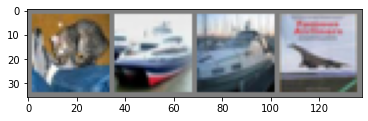

실제 정답:    cat,  ship,  ship, plane
모델 예측:    dog,   car,  ship, plane


In [15]:
# 원래 이미지랑 같이 볼까요?
imshow(torchvision.utils.make_grid(images[:4]))
print('실제 정답: ', ', '.join('%5s' % classes[labels[j]] for j in range(4)))
print('모델 예측: ', ', '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

나름 잘 맞히는 거 같습니다. <br/>
그러면 이제 전체 테스트셋에 대해 정답과 비교해서 몇 개나 맞히는지 보겠습니다. 

### 테스트셋 정답률 확인해보기

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개의 테스트 이미지에 대한 정답률: %d %%' % (
    100 * correct / total))

10000개의 테스트 이미지에 대한 정답률: 54 %


### 각 클래스 별 정답률 확인해보기

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():  # 매우매우 중요! 테스트셋으로 학습하는 건 반칙입니다. 테스트셋으로 backprop을 하면 안 되지요.
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('%5s 클래스의 정답률 : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

plane 클래스의 정답률 : 60 %
  car 클래스의 정답률 : 68 %
 bird 클래스의 정답률 : 33 %
  cat 클래스의 정답률 : 31 %
 deer 클래스의 정답률 : 31 %
  dog 클래스의 정답률 : 50 %
 frog 클래스의 정답률 : 62 %
horse 클래스의 정답률 : 68 %
 ship 클래스의 정답률 : 56 %
truck 클래스의 정답률 : 70 %


# 과제:

### 1.ipynb 파일 제출 (10점)
convolution layer **2층** 이상의 convnet을 만들어서 <br/>
테스트 데이터에 대한 정답률을 높여서 ipynb 파일을 제출을 하시면 됩니다! <br/>
모델을 정의하고 이것저것 바꿔보세요. <br/>
**55%**를 넘겨보도록 해보세요!

- 55%를 넘기시면 8점
- 57.5%를 넘기시면 9점
- 60%를 넘기시면 10점

수업 시간에 말한 거 이외의 힌트:<br/>
`self.conv2`가 있어야겠죠 2층을 쌓으려면? <br/>
이건 weight기 때문에 따로 별도로 `self.conv2`가 있어야 하지만 relu나 maxpool은 파라미터가 없기 때문에 있는 거 그대로 쓰시면 되는 거예요! <br/>
과제에서 반드시 convolution layer를 2층 이상을 쌓으셔야 해요. 거기에 추가로 fc layer도 더 쌓으실 수도 있겠죠? <br/>

### 2.실험 결과 설명 제출 (5점)
Learning rate를 크게 해서 돌려보기도 하고 작게 해서 돌려보기도 하면서 각각의 training loss graph를 비교해보세요.<br/>
앞에서 한 것처럼 그래프를 그려보세요. 각 실험에 대한 graph가 노트북 파일 내에 남아있어야 해요. <br/>
그리고 그 성능에 차이가 나는 이유를 생각해서 써보세요. 

## 주의사항
ipynb 파일의 이름은 `[학번]_[이름].ipynb`로 제출하셔야 합니다. 예시: `2019-12321_김학생.ipynb`<br/>
형식을 지키지 않으실 경우 감점 1점 있습니다.

## 과제 1 답안

### 실험 결과 설명

Convolution Layer을 2개 쌓기 위해서는 `kernel_size = 5, padding = 0`이 가능할 것이라고 생각했습니다.   
따라서 이 두 개 인자의 값은 고정하고 filter depth의 경우에 기존에 제시되었던 6에 대해서 배수를 적용해보았습니다.   
다음은 여러 가지 경우의 수에 대한 실험 결과입니다. 

\* conv 구조 열의 데이터는 nn.Conv2d에 들어가는 파라미터(`in_channels`, `out_channels`, `kernel_size`)를 의미합니다.

|conv1 구조| conv2 구조| final loss| test 정답률 |
|:-:|:-:|:-:|:-:|
|(3, 6, 5)|(6, 6, 5)|2.3|52%|
|(3, 6, 5)|(6, 12, 5)|1.319| 54%|
|(3, 6, 5)|(6, 48, 5)|1.176|57%|
|(3, 12, 5)|(12, 48, 5)|1.135|62%|

다음는 best model에 대한 코드 수행 결과입니다.



In [148]:

import torch.nn as nn

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(3, 12, 5)
    self.conv2 = nn.Conv2d(12, 48, 5)

    self.pool = nn.MaxPool2d(2,2)
    self.relu = nn.ReLU()

    self.fc1 = nn.Linear(5*5*48, 10)
  
  def forward(self, x):
    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))
    x = torch.flatten(x, 1)

    x = self.fc1(x)

    return x

net = Net()

In [149]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)  # Learning rate: 학습률. 한 번의 optimizer step에서 얼마나 멀리 갈지. 

In [150]:
training_loss_history = []
test_loss_history = []

for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # 2000 미니배치마다 출력
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))

            training_loss_history.append(running_loss / 200)
            
            with torch.no_grad():
                running_test_loss = 0.0
                for i, test_data in enumerate(testloader, 0):
                    test_images, test_labels = test_data
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
                    running_test_loss += test_loss.item()
                
                test_loss_history.append(running_test_loss / i)
                    
            running_loss = 0.0
                    
print('학습 끝!')

[1,   200] loss: 2.065
[1,   400] loss: 1.789
[1,   600] loss: 1.617
[1,   800] loss: 1.564
[1,  1000] loss: 1.482
[1,  1200] loss: 1.459
[1,  1400] loss: 1.390
[1,  1600] loss: 1.364
[1,  1800] loss: 1.346
[1,  2000] loss: 1.337
[1,  2200] loss: 1.294
[1,  2400] loss: 1.291
[1,  2600] loss: 1.262
[1,  2800] loss: 1.237
[1,  3000] loss: 1.231
[2,   200] loss: 1.130
[2,   400] loss: 1.116
[2,   600] loss: 1.172
[2,   800] loss: 1.152
[2,  1000] loss: 1.147
[2,  1200] loss: 1.092
[2,  1400] loss: 1.132
[2,  1600] loss: 1.170
[2,  1800] loss: 1.164
[2,  2000] loss: 1.114
[2,  2200] loss: 1.134
[2,  2400] loss: 1.131
[2,  2600] loss: 1.103
[2,  2800] loss: 1.067
[2,  3000] loss: 1.135
학습 끝!


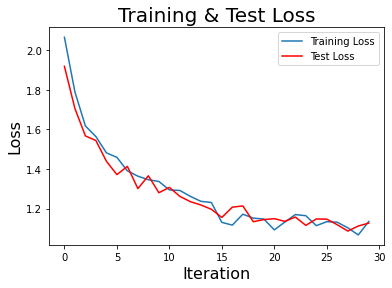

In [153]:
plt.plot(training_loss_history, label="Training Loss") 
plt.plot(test_loss_history, 'r', label="Test Loss") 
plt.title('Training & Test Loss', fontsize=20) 
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.show()

In [154]:
# 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [155]:
# 모델 불러오기
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [156]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개의 테스트 이미지에 대한 정답률: %d %%' % (
    100 * correct / total))

10000개의 테스트 이미지에 대한 정답률: 62 %


## 과제 2 답안

학습률이란 모델이 optimizer가 계산한 방향으로 얼마나 큰 보폭으로 이동할 것인가 지표입니다.  
이 값이 너무 크면 손실함수가 최소가 되는 지점을 넘어가서 loss가 큰 폭으로 요동치고 결국 최소점을 못찾아가게 됩니다.(figure의 맨 왼쪽 그래프)  
반대로 값이 너무 작으면 주어진 iteration 안에 최소점을 찾지 못해서 이 역시 최소점을 찾아가지 못하게 됩니다. (figure의 맨 오른쪽 그래프)  
따라서 적절한 학습률을 찾는 것이 중요한데, 현재의 모델에서는 0.001~0.01 사이의 값이 가장 좋을 것으로 예상됩니다. 






[1,   500] loss: 2.281
[1,  1000] loss: 2.199
[1,  1500] loss: 2.168
[1,  2000] loss: 2.134
[1,  2500] loss: 2.170
[1,  3000] loss: 2.140
[2,   500] loss: 2.276
[2,  1000] loss: 2.316
[2,  1500] loss: 2.192
[2,  2000] loss: 2.113
[2,  2500] loss: 2.092
[2,  3000] loss: 2.098
learning_rate = 0.1 학습 끝!
[1,   500] loss: 1.840
[1,  1000] loss: 1.544
[1,  1500] loss: 1.445
[1,  2000] loss: 1.394
[1,  2500] loss: 1.365
[1,  3000] loss: 1.351
[2,   500] loss: 1.247
[2,  1000] loss: 1.254
[2,  1500] loss: 1.245
[2,  2000] loss: 1.243
[2,  2500] loss: 1.260
[2,  3000] loss: 1.246
learning_rate = 0.01 학습 끝!
[1,   500] loss: 2.094
[1,  1000] loss: 1.831
[1,  1500] loss: 1.682
[1,  2000] loss: 1.582
[1,  2500] loss: 1.521
[1,  3000] loss: 1.478
[2,   500] loss: 1.408
[2,  1000] loss: 1.375
[2,  1500] loss: 1.336
[2,  2000] loss: 1.322
[2,  2500] loss: 1.305
[2,  3000] loss: 1.262
learning_rate = 0.001 학습 끝!
[1,   500] loss: 2.292
[1,  1000] loss: 2.252
[1,  1500] loss: 2.173
[1,  2000] loss: 2.087

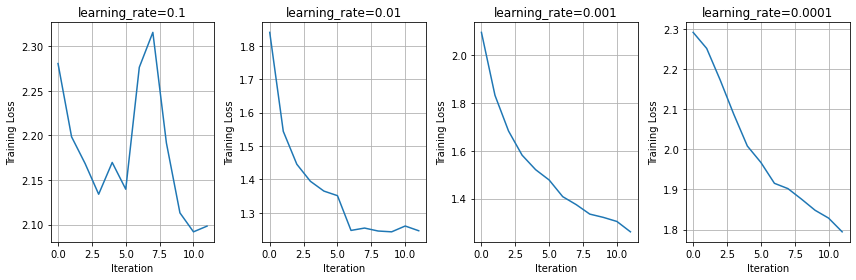

In [164]:
import torch.optim as optim

lr_list = [0.1, 0.01, 0.001, 0.0001]

fig, axes = plt.subplots(nrows=1, ncols=len(lr_list), figsize=(12,4))
for lr_idx, lr_val in enumerate(lr_list) :
  
      net = Net()
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.SGD(net.parameters(), lr=lr_val, momentum=0.9)

      training_loss_history = []

      for epoch in range(2):  # 전체 데이터셋을 몇 번 반복할 건지
          running_loss = 0.0
          for i, data in enumerate(trainloader, 0):
              inputs, labels = data
              optimizer.zero_grad()
              outputs = net(inputs)
              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()
              running_loss += loss.item()
              if i % 500 == 499:    # 2000 미니배치마다 출력
                  print('[%d, %5d] loss: %.3f' %
                        (epoch + 1, i + 1, running_loss / 500))

                  training_loss_history.append(running_loss / 500)       
                  running_loss = 0.0
                          
      print(f'learning_rate = {lr_val} 학습 끝!')
      ax = axes[lr_idx]
      ax.plot(training_loss_history) 
      ax.set_title(f'learning_rate={lr_val}')  
      ax.set_xlabel('Iteration')
      ax.set_ylabel('Training Loss')
      ax.grid()

plt.tight_layout()      

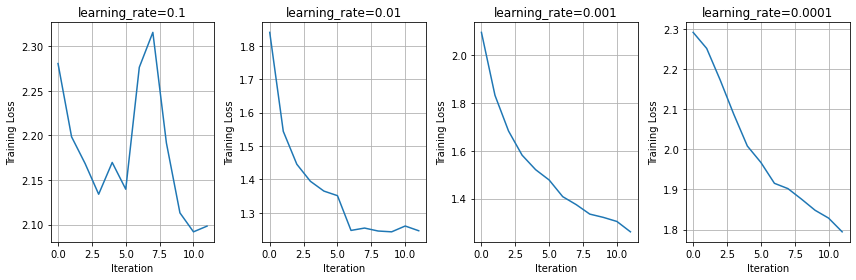

In [166]:
fig.savefig("learning_rate.png")
fig

## [덧] GPU 위에서 학습하기

지금까지는 cpu위에서 다 계산을 한 거예요.<br/>
GPU 위에서 저희 모델이 인풋 데이터를 받아서 출력을 계산하고 싶잖아요? <br/>
그러면 해야 할 일은<br/>
모델도 gpu에 보내고, 데이터도 gpu에 보내는 일입니다.<br/>

그러기 위해선 일단 gpu가 사용 가능한지부터 봐야겠죠?<br/>
CUDA available:



In [103]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA가 있는 컴퓨터라면 CUDA 라고 뜨고 아니면 cpu라고 뜰 겁니다
print(device)

cuda:0


The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

아래처럼 수정을 해주면 모델이 gpu 위에 올라갑니다

```python
net = net.to(device)
```

데이터도 올려줘야겠죠?

```python
inputs, labels = data[0].to(device), data[1].to(device)
 ```

지금은 모델이 너무 작아서 gpu에서 하든 cpu에서 하든 속도 차이가 별로 없습니다.